# Vehicle Detection

We will be performing vehicle detection on a live video.First we will import opencv library and load our video using opencv.

In [8]:
import cv2 

Now we read the video and also load our cascade classifier.

In [9]:
vid = cv2.VideoCapture('video.avi')

In [10]:
cars = cv2.CascadeClassifier('cars.xml')

This is where the magic happens! On running the below code, we run the video in a while loop, we check each and every frame with the help of our cascade classifier and for any cars detected, we print rectangle boxes around them.You can even tweak your parameters in order to learn. Press k to end the loop and close all windows.

In [11]:
while True: 
     
    ret, frames = vid.read() 
    gray = cv2.cvtColor(frames, cv2.COLOR_BGR2GRAY) 
    Cars = cars.detectMultiScale(gray, 1.1, 1) 
    for (x,y,w,h) in Cars: 
        cv2.rectangle(frames,(x,y),(x+w,y+h),(0,0,255),2) 
        cv2.imshow('video2', frames) 
    if cv2.waitKey(33) == ord("k"): 
        break
  
cv2.destroyAllWindows()

As you saw , the video got loaded and the program was able to detect the cars on the road. There were rectangles being made around the cars.

# Pedestrian Detection

We can do pedestrian detection using HOG descriptors.Histogram of Oriented Gradients , HOG descriptors are used for detecting objects. They were first used by Dalal and Triggs in their [2005 paper](https://gurus.pyimagesearch.com/lesson-sample-histogram-of-oriented-gradients-and-car-logo-recognition/#tour_modal).

Now the theory behind is tough and one needs sufficient knowledge of image processing and mathematics to learn this but implementing is easy. 

Just like we used cascade classifiers to classify objects in images, we can use HOG descriptors to classify the objects in an image

In [14]:
import cv2
import imutils
from matplotlib import pyplot as plt

here we have imported all the necessary libraries 

In [15]:
image = cv2.imread('ped.jpg')

Now we have loaded our image with the imread function.

In [16]:
ped = cv2.HOGDescriptor() 
ped.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector()) 

Now here we have made an object of the class HOGDescriptor. We use the SVMDetector in that class and use it to detect people. 

In [17]:
regions,_ = ped.detectMultiScale(image,winStride=(4, 4),padding=(4, 4),scale=1.05) 
   

In this line of code we have implemented our HOGDescriptor to our image using the detectMultScale function. The variable regions gets the coordinates of all the places where it detects a pedestrian. 

In [18]:
for (x, y, w, h) in regions: 
    cv2.rectangle(image, (x, y), (x + w, y + h),(0, 0, 255), 2) 

In this line of code, we are marking the regions around the pedestrians using the rectangle function of cv2.

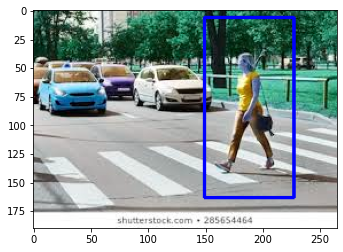

In [19]:
plt.imshow(image)

Now we display our image

# Together

Now we try to detect both pedestrians and cars in an image. The methodolgy would be the same. We will make objects of the cars.xml cascade classifier and the HOGDescriptor for the cars on the road.Then we will aplly them to the image and see results.

In [28]:
both = cv2.imread("ped.jpg")

In [29]:
Gray = cv2.cvtColor(both, cv2.COLOR_BGR2GRAY)
Vehicle = cars.detectMultiScale(Gray, 1.4, 3)
for (x,y,w,h) in Vehicle: 
        cv2.rectangle(both,(x,y),(x+w,y+h),(0,0,255),2) 
         
pedregions,_ = ped.detectMultiScale(both,winStride=(4, 4),padding=(4, 4),scale=1.05)
for (x, y, w, h) in pedregions: 
    cv2.rectangle(both, (x, y), (x + w, y + h),(0, 0, 255), 2) 



Here we have used the same technique as before. Using the objects of our descriptors, we have found out the regions where there is a pedestrian or a vehicle, we have made bounding boxes around them and now we will check our results.

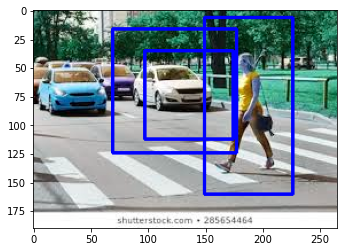

In [30]:
plt.imshow(both)

As you can see the cars.xml cascade classifier has made multiple boundig boxes which is a recurring problem with the cascade classfifiers, whereas the pedestrian HOGDescriptor has done it's job well. This is one of the reason why HOGDescriptors are now used more. 